# Idea: Exploratory Data Analysis (EDA) on Retail Sales Data
## Description:
In this project, you will work with a dataset containing information about retail sales. The goal is
to perform exploratory data analysis (EDA) to uncover patterns, trends, and insights that can
help the retail business make informed decisions.

## Dataset  1 Link :- https://www.kaggle.com/datasets?search=retail+sales
## Dataset  2 Link :- https://www.kaggle.com/datasets/mcdonalds/nutrition-facts

## Key Concepts and Challenges:

- ### Data Loading and Cleaning: 
    - Load the retail sales dataset.
    - Descriptive Statistics: Calculate basic statistics (mean, median, mode, standard deviation).
    - Time Series Analysis: Analyze sales trends over time using time series techniques.
    - Customer and Product Analysis: Analyze customer demographics and purchasing behavior.
    - Visualization: Present insights through bar charts, line plots, and heatmaps.
    - Recommendations: Provide actionable recommendations based on the EDA.

- ### Learning Objectives:
    Gain hands-on experience in data cleaning and exploratory data analysis.
    Develop skills in interpreting descriptive statistics and time series analysis.
    Learn to use data visualization for effective communication of insights.

In [1]:
import pandas as pd
import numpy as np

Load the Dataset

In [2]:
data = pd.read_csv('./retail_sales_dataset.csv')

In [3]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [5]:
data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [8]:
data.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
# select Data Having Non Int bcz i need to update this thing
data.select_dtypes(include=['object'])
for col in data.select_dtypes(include=['object']):
    print(data[col].value_counts())

Date
2023-05-16    11
2023-07-14    10
2023-05-23     9
2023-08-05     8
2023-02-05     8
              ..
2023-09-10     1
2023-02-16     1
2023-03-31     1
2023-01-25     1
2023-05-28     1
Name: count, Length: 345, dtype: int64
Customer ID
CUST001     1
CUST672     1
CUST659     1
CUST660     1
CUST661     1
           ..
CUST339     1
CUST340     1
CUST341     1
CUST342     1
CUST1000    1
Name: count, Length: 1000, dtype: int64
Gender
Female    510
Male      490
Name: count, dtype: int64
Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


In [9]:
# cleaning null data
data['Age'].fillna(data['Age'].mean(), inplace=True)
data

C:\Users\dpsch\AppData\Local\Temp\ipykernel_21848\21469890.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [10]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date']

0     2023-11-24
1     2023-02-27
2     2023-01-13
3     2023-05-21
4     2023-05-06
         ...    
995   2023-05-16
996   2023-11-17
997   2023-10-29
998   2023-12-05
999   2023-04-12
Name: Date, Length: 1000, dtype: datetime64[ns]

In [11]:
data['Product Category'] = data['Product Category'].str.strip()

In [12]:

data.drop_duplicates(inplace=True)

In [13]:
import pandas as pd
from scipy import stats  # For z-score calculation
def zscore_outliers(data):
    z_scores = stats.zscore(data)  # Calculate z-scores
    threshold = 3  # Common threshold for outliers (can be adjusted)
    outliers = data[np.abs(z_scores) > threshold]
    return outliers
outliers_zscore = zscore_outliers(data['Age'])  
print(outliers_zscore)

Series([], Name: Age, dtype: int64)


In [14]:
for col in data.columns:
  # Check if data type is numeric (for mean, median, and standard deviation)
  if not pd.api.types.is_numeric_dtype(data[col]):
    print(f"Statistics for column '{col}' (non-numeric):")
    print(f"  Mode: {data[col].mode()[0]}")  # Most frequent value (mode)
    continue

  print(f"Statistics for column '{col}':")
  print(f"  Mean: {data[col].mean()}")
  print(f"  Median: {data[col].median()}")
  print(f"  Mode: {data[col].mode()[0]}")  # Most frequent value (mode)
  print(f"  Standard deviation: {data[col].std()}")
  print()

Statistics for column 'Transaction ID':
  Mean: 500.5
  Median: 500.5
  Mode: 1
  Standard deviation: 288.8194360957494

Statistics for column 'Date' (non-numeric):
  Mode: 2023-05-16 00:00:00
Statistics for column 'Customer ID' (non-numeric):
  Mode: CUST001
Statistics for column 'Gender' (non-numeric):
  Mode: Female
Statistics for column 'Age':
  Mean: 41.392
  Median: 42.0
  Mode: 43
  Standard deviation: 13.681429659122527

Statistics for column 'Product Category' (non-numeric):
  Mode: Clothing
Statistics for column 'Quantity':
  Mean: 2.514
  Median: 3.0
  Mode: 4
  Standard deviation: 1.1327343409145356

Statistics for column 'Price per Unit':
  Mean: 179.89
  Median: 50.0
  Mode: 50
  Standard deviation: 189.68135627129232

Statistics for column 'Total Amount':
  Mean: 456.0
  Median: 135.0
  Mode: 50
  Standard deviation: 559.997631555123



### Data Visuals

In [18]:
# !pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 325.1 kB/s eta 0:00:31
   ---------------------------------------- 0.1/9.9 MB 465.5 kB/s eta 0:00:22
    --------------------------------------- 0.1/9.9 MB 847.9 kB/s eta 0:00:12
    --------------------------------------- 0.2/9.9 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.3/9.9 MB 1.4 MB/s eta 0:00:07
   - -------------------------------------- 0.4/9.9 MB 1.6 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/9.9 MB 1.7 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/9.9 MB 1.8 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/9.9 MB 1.8 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/9.9 MB 1.8 MB/s eta 0:00:06
   --- --------------------


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [24]:
data.set_index('Date', inplace=True)

#### time series data

<function matplotlib.pyplot.show(close=None, block=None)>

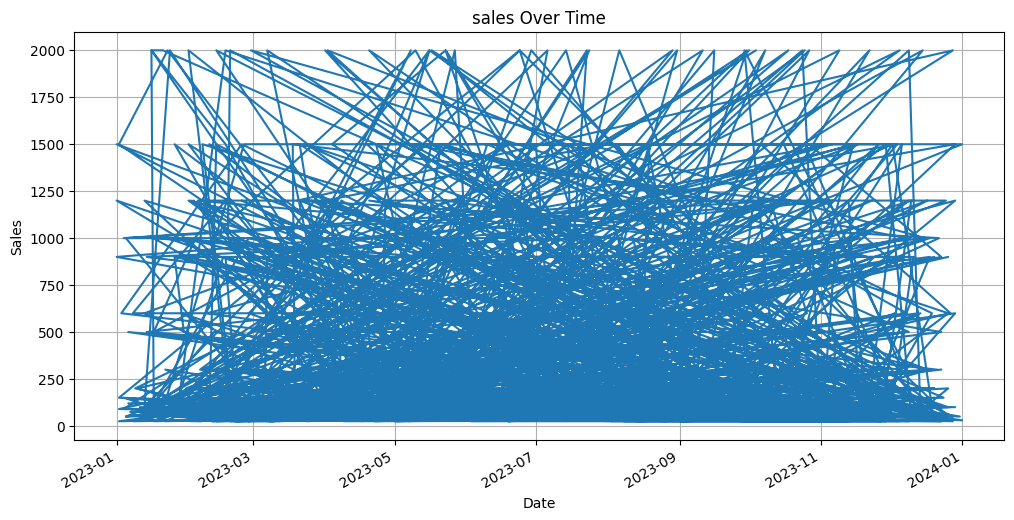

In [25]:
data['Total Amount'].plot(figsize = (12,6))

plt.title('sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show


In [ ]:
#### 7 day moving average

<function matplotlib.pyplot.show(close=None, block=None)>

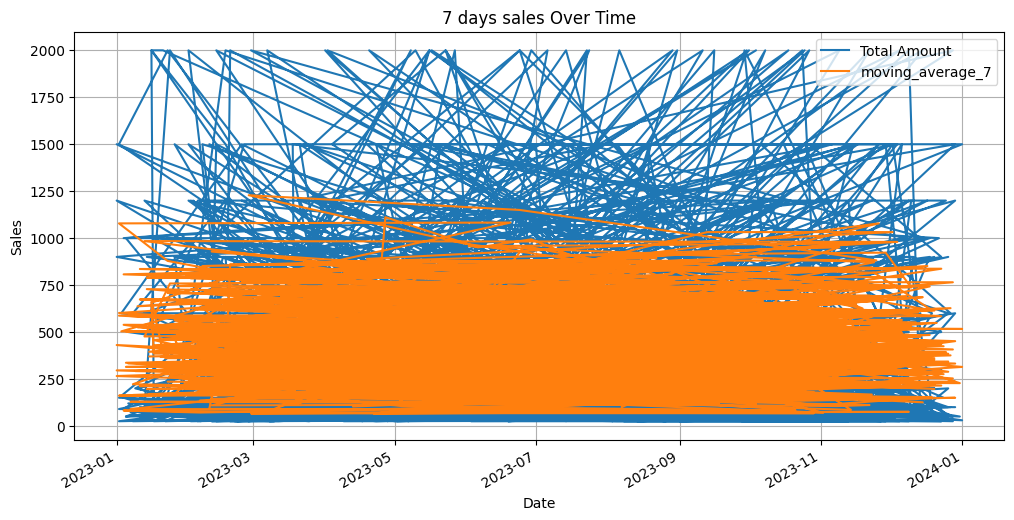

In [29]:
data['moving_average_7'] = data['Total Amount'].rolling(window=7).mean()

data[['Total Amount','moving_average_7']].plot(figsize = (12,6))

plt.title('7 days sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show

# describing demographics

In [30]:
customers_demographics = data[['Customer ID', 'Age', 'Gender']]
customers_demographics.describe(include='all')

,Customer ID,Age,Gender
count,1000,1000.00000,1000
unique,1000,NaN,2
top,CUST001,NaN,Female
freq,1,NaN,510
mean,NaN,41.39200,NaN
std,NaN,13.68143,NaN
min,NaN,18.00000,NaN
25%,NaN,29.00000,NaN
50%,NaN,42.00000,NaN
75%,NaN,53.00000,NaN


In [31]:
# grouping
group_by_age = data.groupby('Age').agg({'Total Amount' : 'mean', 'Quantity': 'nunique'})
group_by_age

,Total Amount,Quantity
Age,,
18,534.047619,4
19,708.095238,4
20,411.666667,4
21,629.250000,4
22,507.407407,4
23,342.500000,4
24,361.000000,4
25,495.000000,4
26,635.454545,4


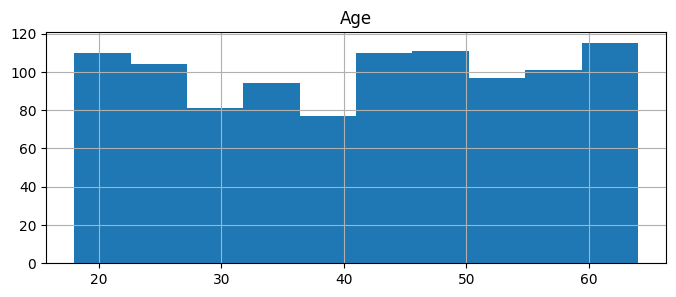

In [42]:
customers_demographics.hist(figsize=(8,3))

plt.show()

#### total Sales

In [44]:
total_sales = data['Total Amount'].sum()
total_sales

456000

#### catagory sales

In [52]:
category_sales = data.groupby('Product Category')['Total Amount'].sum()
category_sales.sort_values(ascending=False)

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64

In [58]:
customer_frequency = data.groupby('Customer ID')['Transaction ID'].count()
customer_frequency.mean()

1.0

### Total Sales

In [60]:
total_sales = data['Total Amount'].sum()
total_sales

456000

#### Plot

In [61]:
top_5_catagories = catagory_sales.sort_values(ascending=False).head(5)

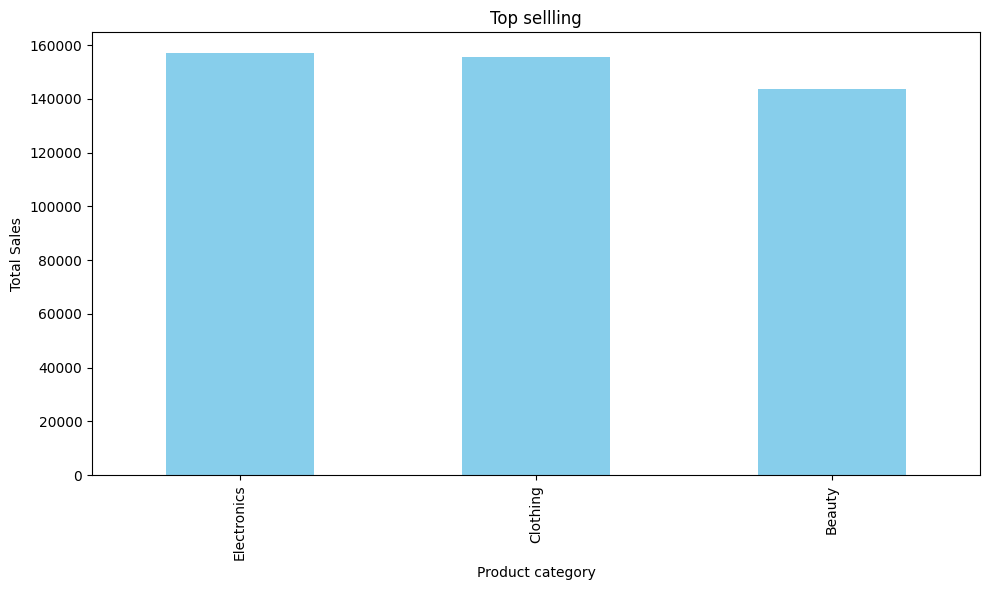

In [62]:
plt.figure(figsize=(10,6))
top_5_catagories.plot(kind = 'bar', color = 'skyblue')
plt.title('Top sellling')
plt.xlabel('Product category')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

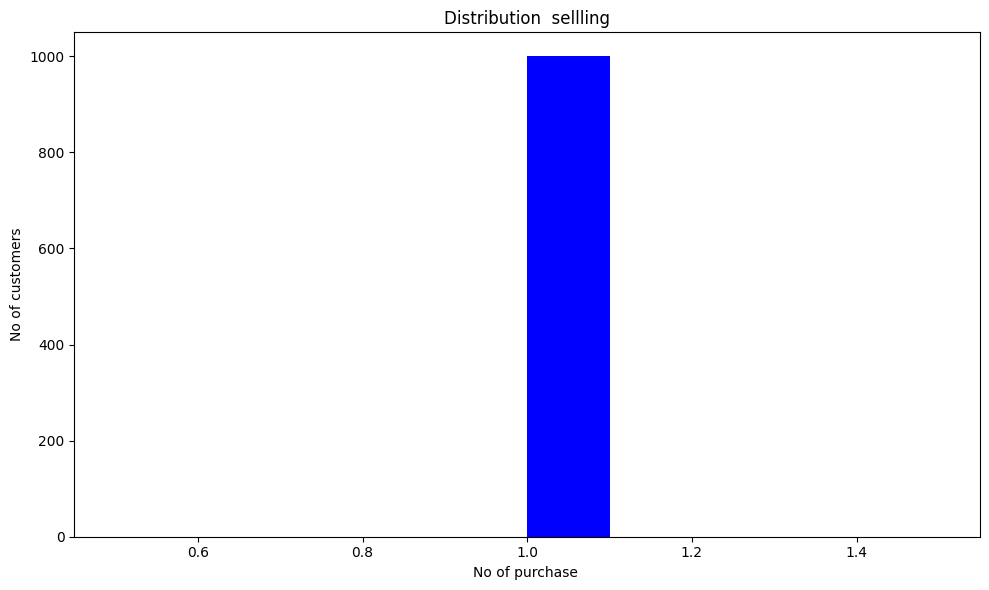

In [64]:
plt.figure(figsize=(10,6))
customer_frequency.plot.hist(bins = 10 , color = 'blue')
plt.title('Distribution  sellling')
plt.xlabel('No of purchase ')
plt.ylabel('No of customers')
plt.tight_layout()
plt.show()

In [68]:
avg_purchase_value = data.groupby('Customer ID')['Total Amount'].mean()
avg_purchase_value

Customer ID
CUST001     150.0
CUST002    1000.0
CUST003      30.0
CUST004     500.0
CUST005     100.0
            ...  
CUST995      30.0
CUST996      50.0
CUST997      90.0
CUST998     100.0
CUST999     150.0
Name: Total Amount, Length: 1000, dtype: float64

In [70]:
purchase_frequency_gender = data.groupby('Gender')['Transaction ID'].count()
purchase_frequency_gender

Gender
Female    510
Male      490
Name: Transaction ID, dtype: int64

In [72]:
data['Age Group'] = pd.cut(data['Age'], bins=[18, 25, 35, 45, 65, 100])
avg_spend_value = data.groupby('Age Group')['Total Amount'].mean()
avg_spend_value

C:\Users\dpsch\AppData\Local\Temp\ipykernel_21848\746764990.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spend_value = data.groupby('Age Group')['Total Amount'].mean()


Age Group
(18, 25]     495.506757
(25, 35]     480.390244
(35, 45]     454.801980
(45, 65]     427.122642
(65, 100]           NaN
Name: Total Amount, dtype: float64

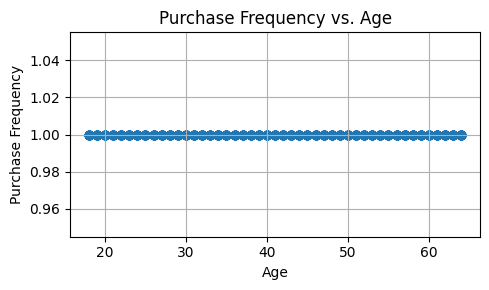

In [73]:
customer_frequency = data.groupby('Customer ID')['Transaction ID'].count()
plt.figure(figsize=(5, 3))
plt.scatter(data['Age'], customer_frequency)
plt.title('Purchase Frequency vs. Age')
plt.xlabel('Age')
plt.ylabel('Purchase Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()